In [0]:
''' 
PART A
What is an Intrusion Detection System? Is it possible to implement an Intrusion Detection System on this dataset? Explain the workflow as described in the paper for implementing Intrusion Detection System.

An Intrusion Detection System is a type of security system that is designed to automatically detect malicious activity or policy violations on a network or a system. 
Yes, it is possible to implement an intrusion detection system on this data set

To implement it, we need to follow the following steps:
1. load the dataset and export it into RDD and dataframes
2. data processing which involves string indexer, encoding and standardization
3. feature selection and extraction
4. split up the data into training and testing set
5. train Spark-Chi-SVM model with training data
6. test the model with KDD dataset
7. evaluate the model
'''


Out[30]: ' \nPART A\nWhat is an Intrusion Detection System? Is it possible to implement an Intrusion Detection System on this dataset? Explain the workflow as described in the paper for implementing Intrusion Detection System.\n\nAn Intrusion Detection System is a type of security system that is designed to automatically detect malicious activity or policy violations on a network or a system. \nYes, it is possible to implement an intrusion detection system on this data set\n\nTo implement it, we need to follow the following steps:\n1. load the dataset and export it into RDD and dataframes\n2. data processing which involves string indexer, encoding and standardization\n3. feature selection and extraction\n4. split up the data into training and testing set\n5. train Spark-Chi-SVM model with training data\n6. test the model with KDD dataset\n7. evaluate the model\n'

In [0]:
# Q2
import urllib.request
urllib.request.urlretrieve("http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data_10_percent.gz", "/tmp/kddcup_data.gz")
dbutils.fs.mv("file:/tmp/kddcup_data.gz", "dbfs:/kdd/kddcup_data.gz")
display(dbutils.fs.ls("dbfs:/kdd"))

path,name,size,modificationTime
dbfs:/kdd/kddcup_data.gz,kddcup_data.gz,2144903,1688709300000


In [0]:
# Q3

from pyspark import SparkContext
sc = SparkContext.getOrCreate()

rdd = sc.textFile("dbfs:/kdd/kddcup_data.gz")

for line in rdd.take(10):
    print(line)
print(type(rdd))

0,tcp,http,SF,181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,9,9,1.00,0.00,0.11,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,19,19,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.00,0.00,1.00,0.00,0.00,29,29,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,39,39,1.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,49,49,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.00,0.00,1.00,0.00,0.00,59,59,1.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,normal.
0,tcp,http,SF,212,1940,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,2,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1,69,1.00,0.00,1.00,0

In [0]:
# Q4
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()

split_rdd = rdd.map(lambda line: line.split(','))

df = split_rdd.toDF()

print("Total number of columns=", len(df.columns))


Total number of columns= 42


In [0]:
# Q5
from pyspark.sql import Row

MyRow = Row("duration", "protocol_type", "service", "src_bytes", "dst_bytes", "flag", "label")
new_rdd = split_rdd.map(lambda x: MyRow(x[0], x[1], x[2], x[4], x[5], x[3], x[-1]))

new_df = new_rdd.toDF()
new_df.printSchema()
new_df.show(10)

root
 |-- duration: string (nullable = true)
 |-- protocol_type: string (nullable = true)
 |-- service: string (nullable = true)
 |-- src_bytes: string (nullable = true)
 |-- dst_bytes: string (nullable = true)
 |-- flag: string (nullable = true)
 |-- label: string (nullable = true)

+--------+-------------+-------+---------+---------+----+-------+
|duration|protocol_type|service|src_bytes|dst_bytes|flag|  label|
+--------+-------------+-------+---------+---------+----+-------+
|       0|          tcp|   http|      181|     5450|  SF|normal.|
|       0|          tcp|   http|      239|      486|  SF|normal.|
|       0|          tcp|   http|      235|     1337|  SF|normal.|
|       0|          tcp|   http|      219|     1337|  SF|normal.|
|       0|          tcp|   http|      217|     2032|  SF|normal.|
|       0|          tcp|   http|      217|     2032|  SF|normal.|
|       0|          tcp|   http|      212|     1940|  SF|normal.|
|       0|          tcp|   http|      159|     4087|  S

+-------------+------+
|protocol_type| count|
+-------------+------+
|          udp| 20354|
|          tcp|190065|
|         icmp|283602|
+-------------+------+

+-----------+-----+
|    service|count|
+-----------+-----+
|     tftp_u|    1|
|    pm_dump|    1|
|      red_i|    1|
|      tim_i|    7|
|        X11|   11|
|      urh_i|   14|
|        IRC|   43|
|     Z39_50|   92|
|    netstat|   95|
|        ctf|   97|
|       name|   98|
|     kshell|   98|
|       exec|   99|
|netbios_dgm|   99|
|   http_443|   99|
|       ldap|  101|
|      pop_2|  101|
|       link|  102|
| netbios_ns|  102|
|    daytime|  103|
+-----------+-----+
only showing top 20 rows



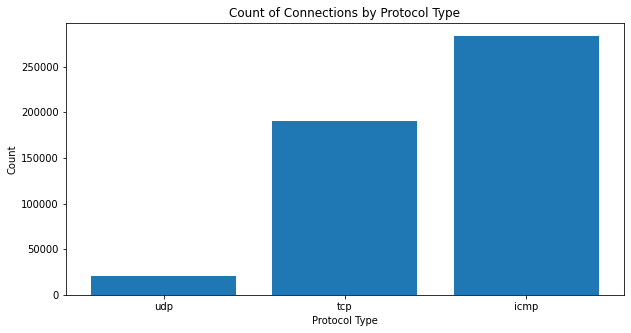

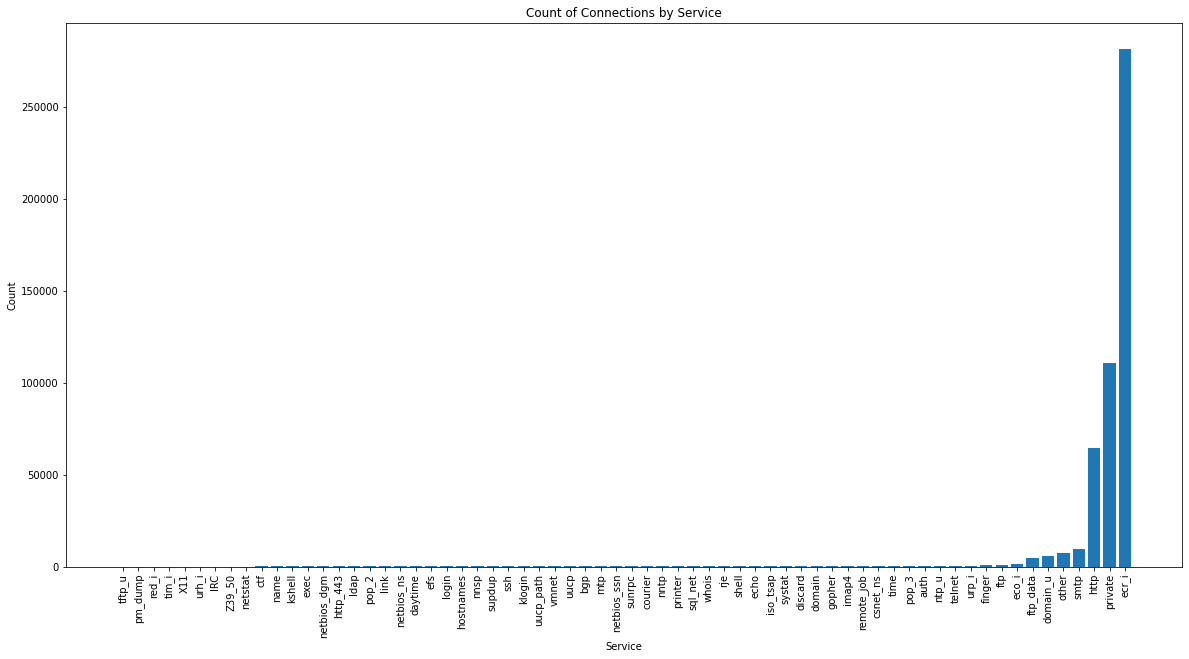

In [0]:
# Q6
import matplotlib.pyplot as plt

protocol_counts = new_df.groupBy("protocol_type").count().orderBy("count")
service_counts = new_df.groupBy("service").count().orderBy("count")

protocol_counts.show()
service_counts.show()

protocol_counts_local = protocol_counts.collect()
service_counts_local = service_counts.collect()

protocol_labels = [row['protocol_type'] for row in protocol_counts_local]
protocol_counts = [row['count'] for row in protocol_counts_local]

service_labels = [row['service'] for row in service_counts_local]
service_counts = [row['count'] for row in service_counts_local]

plt.figure(figsize=(10,5))
plt.bar(protocol_labels, protocol_counts)
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.title('Count of Connections by Protocol Type')
plt.show()

plt.figure(figsize=(20, 10))
plt.bar(service_labels, service_counts)
plt.xlabel('Service')
plt.ylabel('Count')
plt.title('Count of Connections by Service')
plt.xticks(rotation=90)
plt.show()

+------+------+
|  flag| count|
+------+------+
|   OTH|     8|
|    S3|    10|
|RSTOS0|    11|
|    S2|    24|
|    S1|    57|
|    SH|   107|
|  RSTO|   579|
|  RSTR|   903|
|   REJ| 26875|
|    S0| 87007|
|    SF|378440|
+------+------+

+----------------+-----+
|           label|count|
+----------------+-----+
|            spy.|    2|
|           perl.|    3|
|            phf.|    4|
|       multihop.|    7|
|      ftp_write.|    8|
|     loadmodule.|    9|
|        rootkit.|   10|
|           imap.|   12|
|    warezmaster.|   20|
|           land.|   21|
|buffer_overflow.|   30|
|   guess_passwd.|   53|
|           nmap.|  231|
|            pod.|  264|
|       teardrop.|  979|
|    warezclient.| 1020|
|      portsweep.| 1040|
|        ipsweep.| 1247|
|          satan.| 1589|
|           back.| 2203|
+----------------+-----+
only showing top 20 rows



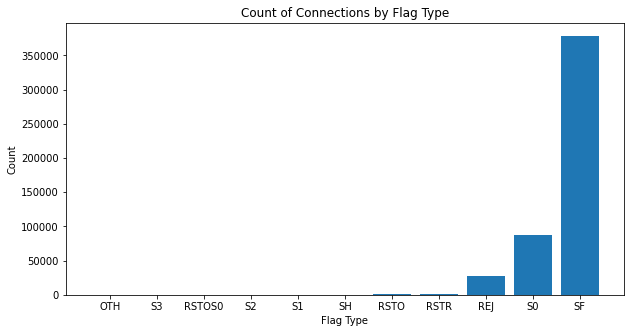

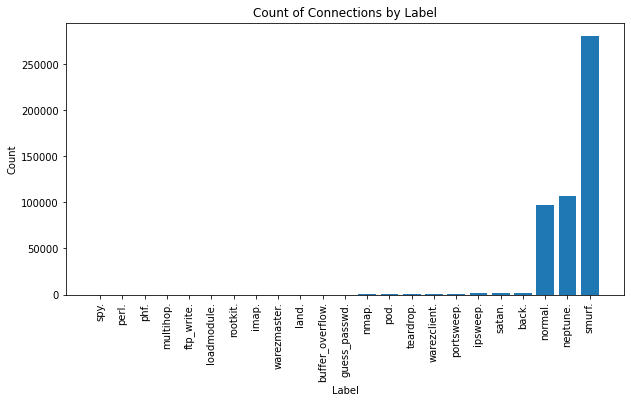

+-----------------+------+
|duration_interval| count|
+-----------------+------+
|                0|488491|
|                1|   472|
|                2|    98|
|                3|    49|
|                4|    31|
|                5|    26|
|                6|    34|
|                7|    26|
|                8|    23|
|                9|    26|
|               10|    20|
|               11|    24|
|               12|    21|
|               13|    12|
|               14|    18|
|               15|    15|
|               16|    14|
|               17|    11|
|               18|    10|
|               19|     7|
+-----------------+------+
only showing top 20 rows



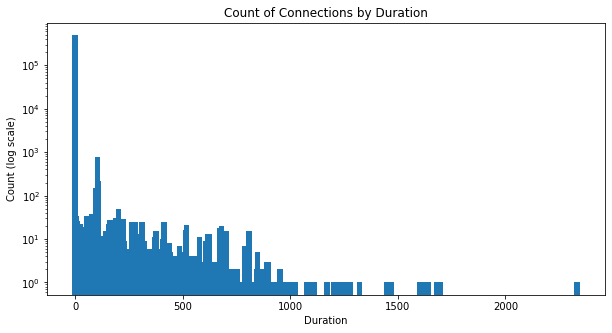

In [0]:
# Q7
from pyspark.sql.functions import floor

# plot number of connections base on flag and label
# most connections have flag of "SF" and most connections have label of "smurf"
flag_counts = new_df.groupBy("flag").count().orderBy("count")
label_counts = new_df.groupBy("label").count().orderBy("count")

flag_counts.show()
label_counts.show()

flag_counts_local = flag_counts.collect()
label_counts_local = label_counts.collect()

flag_labels = [row['flag'] for row in flag_counts_local]
flag_counts = [row['count'] for row in flag_counts_local]

label_labels = [row['label'] for row in label_counts_local]
label_counts = [row['count'] for row in label_counts_local]

plt.figure(figsize=(10,5))
plt.bar(flag_labels, flag_counts)
plt.xlabel('Flag Type')
plt.ylabel('Count')
plt.title('Count of Connections by Flag Type')
plt.show()

plt.figure(figsize=(10, 5))
plt.bar(label_labels, label_counts)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Connections by Label')
plt.xticks(rotation=90)
plt.show()

# plot number of connections per 25-seconds duration interval
# most of connections have short duration (0 < duration < 100)
df = new_df.withColumn("duration_interval", floor(new_df["duration"]/25))
duration_counts = df.groupBy("duration_interval").count().orderBy("duration_interval")

duration_counts.show()
duration_counts_local = duration_counts.collect()

duration_labels = [row['duration_interval'] for row in duration_counts_local]
duration_counts = [row['count'] for row in duration_counts_local]

plt.figure(figsize=(10,5))
plt.bar(duration_labels, duration_counts, width=25)  # set width to match the interval
plt.yscale('log')  # set log scale on y-axis
plt.xlabel('Duration')
plt.ylabel('Count (log scale)')
plt.title('Count of Connections by Duration')
plt.show()

In [0]:
# Q8
from pyspark.ml import Pipeline
from pyspark.ml.classification import RandomForestClassifier, LinearSVC
from pyspark.ml.feature import StringIndexer, VectorAssembler, StandardScaler
from pyspark.sql import SparkSession
from pyspark.sql.functions import when, col

spark = SparkSession.builder.appName('Intrusion_Detection').getOrCreate()
df = new_df.withColumn('new_label', when(new_df.label == 'normal.', 'normal').otherwise('attack'))

# df.show(10)
df = df.withColumn('duration', col('duration').cast('float'))
df = df.withColumn('src_bytes', col('src_bytes').cast('float'))

indexer = StringIndexer(inputCol='protocol_type', outputCol='protocol_type_index')
df = indexer.fit(df).transform(df)

label_indexer = StringIndexer(inputCol="new_label", outputCol="labelIndex")
df = label_indexer.fit(df).transform(df)

# df.select("new_label", "labelIndex").distinct().show()

features = ['duration', 'protocol_type_index', 'src_bytes']
target = ['new_label']

assembler = VectorAssembler(inputCols=features, outputCol="assembled_features")
df = assembler.transform(df)

scaler = StandardScaler(inputCol="assembled_features", outputCol="features")
scalerModel = scaler.fit(df)
df = scalerModel.transform(df)

rf_classifier = RandomForestClassifier(labelCol="labelIndex", featuresCol="features")
svc_classifier = LinearSVC(labelCol="labelIndex", featuresCol="features")

rf_pipeline = Pipeline(stages=[rf_classifier])
svc_pipeline = Pipeline(stages=[svc_classifier])

train_data, test_data = df.randomSplit([0.8, 0.2])

rf_model = rf_pipeline.fit(train_data)
svc_model = svc_pipeline.fit(train_data)

rf_predictions = rf_model.transform(test_data)
svc_predictions = svc_model.transform(test_data)

rf_predictions.select('new_label', 'prediction').show()
svc_predictions.select('new_label', 'prediction').show()

+---------+----------+
|new_label|prediction|
+---------+----------+
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
+---------+----------+
only showing top 20 rows

+---------+----------+
|new_label|prediction|
+---------+----------+
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   attack|       0.0|
|   atta

In [0]:
# Q9

from pyspark.ml.evaluation import BinaryClassificationEvaluator

binary_evaluator = BinaryClassificationEvaluator(labelCol="labelIndex")

rf_auc = binary_evaluator.evaluate(rf_predictions, {binary_evaluator.metricName: "areaUnderROC"})
print("Random Forest - AUC: ", rf_auc)

svc_auc = binary_evaluator.evaluate(svc_predictions, {binary_evaluator.metricName: "areaUnderROC"})
print("LinearSVC - AUC: ", svc_auc)


rf_pr_auc = binary_evaluator.evaluate(rf_predictions, {binary_evaluator.metricName: "areaUnderPR"})
print("Random Forest - PR-AUC: ", rf_pr_auc)

svc_pr_auc = binary_evaluator.evaluate(svc_predictions, {binary_evaluator.metricName: "areaUnderPR"})
print("LinearSVC - PR-AUC: ", svc_pr_auc)


# I have selected Random Forest and LinearSVC models, becasue they both work well for binary classification. 
# Random Forest operates by constructing multiple decision trees and Linear SVC works by finding a hyperplane to seperate the classes in the feature space.
# the accuracy for random forest is better because it is more versatile and can capture more complex patterns and relationships by combining many decision trees and the data might contain non-linear components.

Random Forest - AUC:  0.9894378499213938
LinearSVC - AUC:  0.7845883733404818
Random Forest - PR-AUC:  0.9734135118181629
LinearSVC - PR-AUC:  0.4802389259743374


In [0]:
# PART B
'''
1. 
    1. F becasue a PaaS solution like Azure provides an platform for user to develop, run and manage the application but does not provide development service to add features.
    2. True becasue many database on Azure offer high availability and fault tolerance.
2. D, becasue a relational database provides ACID properties which makes them strong consistent.
3. D, the service provider is responsible for scaling and making the service avaliable, but the user needs to condigure it to suit their needs.
4. 
    1. F, to achieve a hybrid cloud model, the company can integrate the private cloud model with another public cloud service
    2. T, the company can extend it's capacity by offloading some workloads to public cloud.
    3. F, the resources can be accessed by anyone with the necessary permission not just limited to guest users of your company.
5.
    A cloud service that remains available after a failure occurs Fault Tolerance # the service remains avaliable after a fault
    A cloud service that can be recovered after a failure occurs Disaster recovery # can recover from a failure quickly
    A cloud service that performs quickly when demand increases Dynamic Scalability # can scale according to computational demands
    A cloud service that can be accessed quickly from the internet Low Latency # user can access service with low latency
'''

Out[39]: "\n1. \n    1. F becasue a PaaS solution like Azure provides an platform for user to develop, run and manage the application but does not provide development service to add features.\n    2. True becasue many database on Azure offer high availability and fault tolerance.\n2. D, becasue a relational database provides ACID properties which makes them strong consistent.\n3. D, the service provider is responsible for scaling and making the service avaliable, but the user needs to condigure it to suit their needs.\n4. \n    1. F, to achieve a hybrid cloud model, the company can integrate the private cloud model with another public cloud service\n    2. T, the company can extend it's capacity by offloading some workloads to public cloud.\n    3. F, the resources can be accessed by anyone with the necessary permission not just limited to guest users of your company.\n5.\n    A cloud service that remains available after a failure occurs Fault Tolerance # the service remains avaliable 